Assumptions in Multilinear Regression
1. Linearity: The relationship between the predictors and the response is linear.
2. Independence: Observations are independent of each other.
3. Homoscedasticity: The residuals (Y - Y hat)) exhibit constant variance at all levels of the predictor.
4. Normal Distribution of Errors: The residuals of the model are normally distributed.
5. No multicollinearity: The independent variables should not be too highly correlated with each other.
Violations of these assumptions may lead to inefficiency in the regression parameters and unreliable predictions
The general formula for multiple linear regression is:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import numpy as np

In [3]:
cars = pd.read_csv("Cars.csv")
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


Description of columns
1. MPG : Milege of the car (Mile per Gallon)(This is Y-column to be predicted)
2. HP : Horse Power of the car(X1 column)
3. VOL : Volume of the car(Miles per Hour)(X3 column)
4. SP : Top speed of the car(Miles of the car(Miles Per Hour)(X3 column)
5. WT : Weight of the car(Pounds)(X4 column)

In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [6]:
cars.isna().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

Observations
1. There are no missing values
2. There are 81 observations (81 different cars data)
3. The data type of the column are also relevant and valid

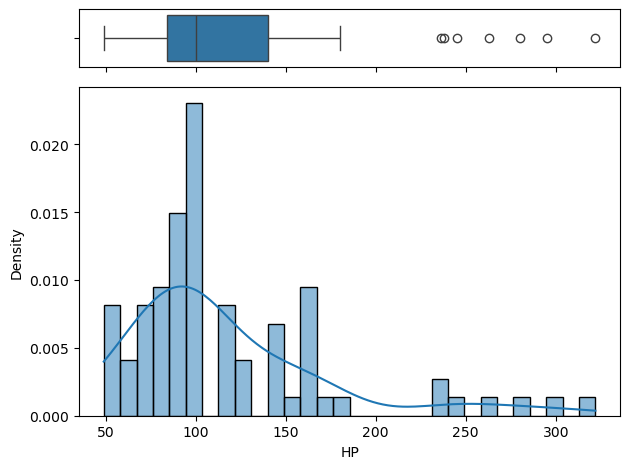

In [21]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=cars, x='HP', ax=ax_box, orient='h')
ax_box.set(xlabel='')
sns.histplot(data=cars, x='HP', ax=ax_hist, bins=30, kde=True, stat="density")
ax_hist.set(ylabel='Density')
plt.tight_layout()
plt.show()

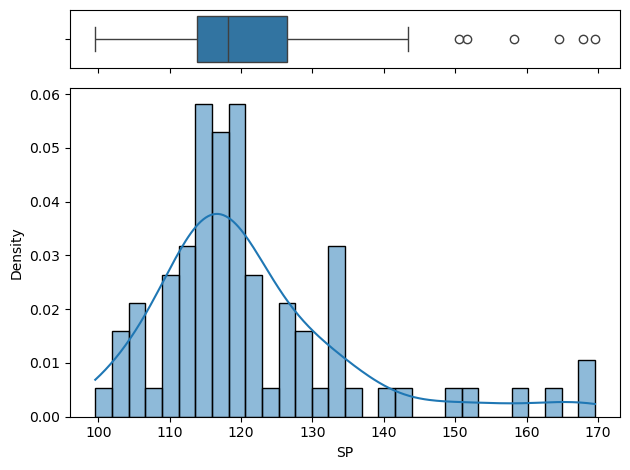

In [23]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=cars, x='SP', ax=ax_box, orient='h')
ax_box.set(xlabel='')
sns.histplot(data=cars, x='SP', ax=ax_hist, bins=30, kde=True, stat="density")
ax_hist.set(ylabel='Density')
plt.tight_layout()
plt.show()

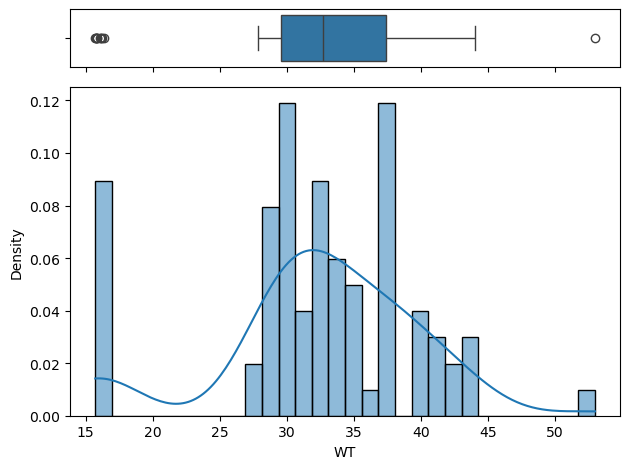

In [27]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=cars, x='WT', ax=ax_box, orient='h')
ax_box.set(xlabel='')
sns.histplot(data=cars, x='WT', ax=ax_hist, bins=30, kde=True, stat="density")
ax_hist.set(ylabel='Density')
plt.tight_layout()
plt.show()

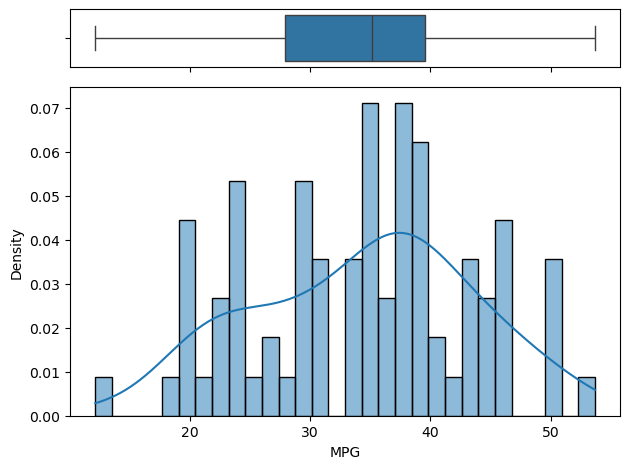

In [29]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=cars, x='MPG', ax=ax_box, orient='h')
ax_box.set(xlabel='')
sns.histplot(data=cars, x='MPG', ax=ax_hist, bins=30, kde=True, stat="density")
ax_hist.set(ylabel='Density')
plt.tight_layout()
plt.show()

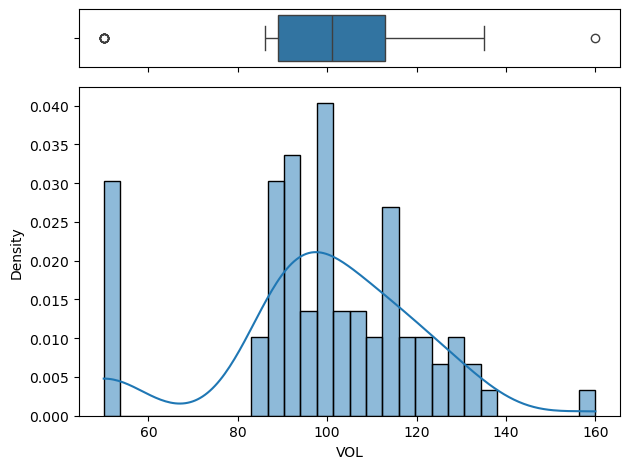

In [25]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=cars, x='VOL', ax=ax_box, orient='h')
ax_box.set(xlabel='')
sns.histplot(data=cars, x='VOL', ax=ax_hist, bins=30, kde=True, stat="density")
ax_hist.set(ylabel='Density')
plt.tight_layout()
plt.show()

Observations from boxplot and histograms
1. There are some extreme values(outliers) observed in towards the right tail of SP and HP distributions.
2. In VOL and WT columns, a few outliers are observed in both tails of their distributions.
3. The extreme values of cars data may have come from the specially designed of cars.
4. As this multi-dimensional data,the outliers with respect to spatial dimensions may have to be considered while building the resgression model.

In [33]:
cars[cars.duplicated()]

,HP,MPG,VOL,SP,WT


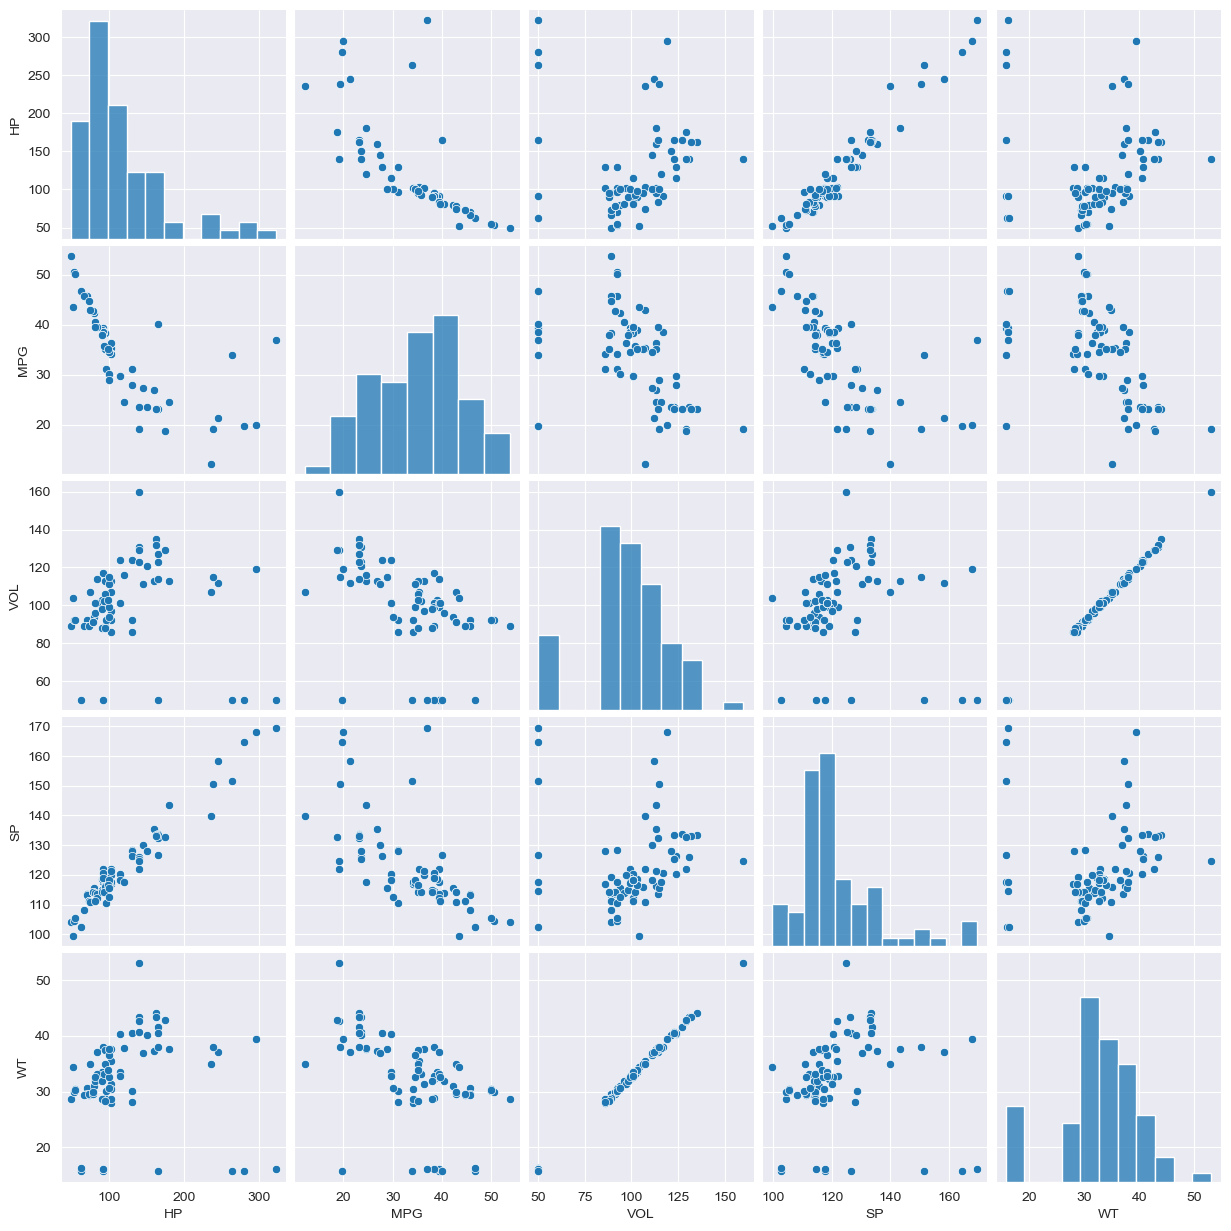

In [35]:
sns.set_style(style='darkgrid')
sns.pairplot(cars)

In [40]:
cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


### Observations from correlation plots and Coeffcients
- Between x and y, all the x variables are shoeing moderate to high correlation strengths, highest being between HP and MPG
- Therefore this dataset qualifies for buliding a multiple linear regression model to predict MPG
- Among x columns (x1,x2,x3, and x4),some very high correlation strengths are observed between SP vs HP,VOL vs WT
- The high correlation among x columns is not desirable as it might lead to multicollinearity problem

### Preparing a preliminary model considering all X columns

In [42]:
model = smf.ols('MPG~WT+VOL+SP+HP',data=cars).fit()

In [44]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Wed, 05 Feb 2025   Prob (F-statistic):           1.54e-23
Time:                        11:27:15   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
SP             0.3956      0.158      2.500      0.015       0.080       0.711
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""